In [1]:
! pip install aequitas


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np 
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot


In [3]:
train_df = pd.read_csv('../data/ml_100k/train_data.csv')
train_df.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [4]:
item_df = pd.read_csv('../data/ml_100k/item_data.csv')
item_df.head()

,id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user_df = pd.read_csv('../data/ml_100k/user_data.csv')
user_df.head()

,id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# test on movie category and new encoding type 
mtypes = item_df.iloc[:, 6:]
mtypes['num_cats'] = mtypes.values.sum(axis=1)
mtypes.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_cats
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3


In [7]:
print(mtypes['num_cats'].min(), mtypes['num_cats'].max())

0 6


In [8]:
print(mtypes.loc[mtypes['num_cats']==1, :].shape)

(831, 19)


In [9]:
mtypes.shape

(1682, 19)

In [10]:
cats = mtypes.columns
def getCat(x):
    # print(list(x))
    try:
        i = list(x).index(1)
        ctype = cats[i]
    except:
        ctype = 'None'
    return ctype

In [11]:
mtypes['cat'] = mtypes.iloc[:, :-2].apply(lambda x: getCat(x), axis=1)

In [12]:
mtypes.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_cats,cat
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Animation
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,Action
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Thriller
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,Action
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3,Crime


In [13]:
item_df['release_date'] = pd.to_datetime(item_df['release_date'])
item_df['year'] = item_df['release_date'].dt.year
item_df['cat'] = mtypes['cat']
item_df.head()

,id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,cat
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995.0,Animation
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995.0,Action
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,Thriller
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995.0,Action
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,Crime


In [14]:
full_trans_df = train_df.iloc[:, :-1]
full_trans_df = pd.merge(full_trans_df, item_df.loc[:, ['id', 'cat', 'year']], how='left', left_on='item_id', right_on='id')
full_trans_df.head()

,user_id,item_id,rating,id,cat,year
0,1,1,5,1,Animation,1995.0
1,1,2,3,2,Action,1995.0
2,1,3,4,3,Thriller,1995.0
3,1,4,3,4,Action,1995.0
4,1,5,3,5,Crime,1995.0


In [15]:
full_trans_df = pd.merge(full_trans_df, user_df.loc[:, ['id', 'gender', 'occupation']], how='left', left_on='user_id', right_on='id')
full_trans_df.head()

,user_id,item_id,rating,id_x,cat,year,id_y,gender,occupation
0,1,1,5,1,Animation,1995.0,1,M,technician
1,1,2,3,2,Action,1995.0,1,M,technician
2,1,3,4,3,Thriller,1995.0,1,M,technician
3,1,4,3,4,Action,1995.0,1,M,technician
4,1,5,3,5,Crime,1995.0,1,M,technician


In [16]:
full_trans_df.drop(['id_x', 'id_y', 'user_id', 'item_id'], axis=1,  inplace=True)
full_trans_df.head()

,rating,cat,year,gender,occupation
0,5,Animation,1995.0,M,technician
1,3,Action,1995.0,M,technician
2,4,Thriller,1995.0,M,technician
3,3,Action,1995.0,M,technician
4,3,Crime,1995.0,M,technician


In [17]:
full_trans_df['label_value'] = full_trans_df['rating'].apply(lambda x: 0 if x<3 else 1)
full_trans_df = full_trans_df.reset_index()
full_trans_df.rename(columns={'rating': 'score', 'index': 'entity_id'}, inplace=True)
full_trans_df['year'] = full_trans_df['year'].astype(str)
full_trans_df.head()

,entity_id,score,cat,year,gender,occupation,label_value
0,0,5,Animation,1995.0,M,technician,1
1,1,3,Action,1995.0,M,technician,1
2,2,4,Thriller,1995.0,M,technician,1
3,3,3,Action,1995.0,M,technician,1
4,4,3,Crime,1995.0,M,technician,1


In [18]:
full_trans_df = full_trans_df.loc[:, ['score', 'label_value', 'cat', 'year', 'gender', 'occupation']]
full_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        80000 non-null  int64 
 1   label_value  80000 non-null  int64 
 2   cat          80000 non-null  object
 3   year         80000 non-null  object
 4   gender       80000 non-null  object
 5   occupation   80000 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [19]:
g = Group()
xtab, _ = g.get_crosstabs(full_trans_df)


In [20]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [21]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]


,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,4719,cat,Action,1114,19452,0,15612,3840,1114,16726,3840,20566,80000
1,0,binary 0/1,4719,cat,Adventure,169,2623,0,2125,498,169,2294,498,2792,80000
2,0,binary 0/1,4719,cat,Animation,203,2391,0,2039,352,203,2242,352,2594,80000
3,0,binary 0/1,4719,cat,Children,78,1964,0,1412,552,78,1490,552,2042,80000
4,0,binary 0/1,4719,cat,Comedy,879,17314,0,13665,3649,879,14544,3649,18193,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,binary 0/1,4719,occupation,salesman,21,705,0,587,118,21,608,118,726,80000
109,0,binary 0/1,4719,occupation,scientist,132,1611,0,1389,222,132,1521,222,1743,80000
110,0,binary 0/1,4719,occupation,student,1146,16755,0,13504,3251,1146,14650,3251,17901,80000
111,0,binary 0/1,4719,occupation,technician,199,2579,0,2133,446,199,2332,446,2778,80000


In [22]:
aqp = Plot()


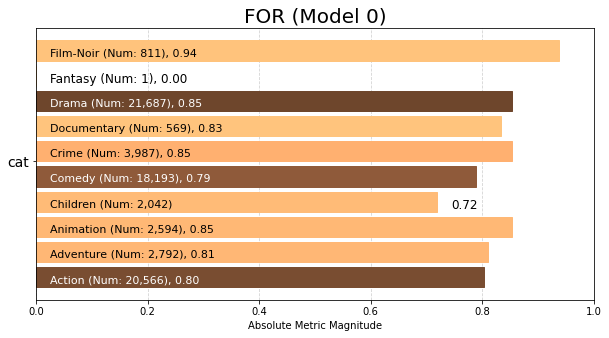

In [23]:
fnr = aqp.plot_group_metric(xtab.iloc[:10, :], 'for')


---
 Model Disparity

In [24]:
b = Bias()

In [25]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=full_trans_df)
majority_bdf[['attribute_name', 'attribute_value'] +  b.list_disparities(majority_bdf)]


get_disparity_major_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,cat,Action,0.739217,0.779510,1.0,NaN,0.940005,NaN,1.015035,0.828095,1.0,1.350411
1,cat,Adventure,0.112143,0.871079,1.0,NaN,0.948848,NaN,1.007350,0.915968,1.0,1.298764
2,cat,Animation,0.134705,1.126192,1.0,NaN,0.998789,NaN,0.989000,1.125764,1.0,1.007076
3,cat,Children,0.051758,0.549699,1.0,NaN,0.842033,NaN,1.030536,0.650871,1.0,1.922635
4,cat,Comedy,0.583278,0.695298,1.0,NaN,0.924375,NaN,1.021740,0.751436,1.0,1.441702
...,...,...,...,...,...,...,...,...,...,...,...,...
108,occupation,salesman,0.018325,0.451830,1.0,NaN,1.033073,NaN,1.047393,0.441539,1.0,0.862622
109,occupation,scientist,0.115183,1.182958,1.0,NaN,1.069766,NaN,0.990714,1.109424,1.0,0.710207
110,occupation,student,1.000000,1.000000,1.0,NaN,1.000000,NaN,1.000000,1.000000,1.0,1.000000
111,occupation,technician,0.173647,1.118957,1.0,NaN,1.026175,NaN,0.992287,1.090881,1.0,0.891273


In [26]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=full_trans_df,
                                            check_significance=True)
min_metric_bdf.style

get_disparity_min_metric()


/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/scipy/stats/mores

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,4719,cat,Action,0.066603,1.000000,0.802591,0.000000,0.000000,0.933397,0.197409,1.000000,1114,19452,0.236067,0.054167,0,15612,3840,1114,16726,3840,20566,80000,0.813284,False,False,nan,Action,None,1.039372,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,3.145670,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
1,0,binary 0/1,4719,cat,Adventure,0.073670,1.000000,0.810141,0.000000,0.000000,0.926330,0.189859,1.000000,169,2623,0.035813,0.060530,0,2125,498,169,2294,498,2792,80000,0.821633,False,False,nan,Action,None,1.031502,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,3.025361,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
2,0,binary 0/1,4719,cat,Animation,0.090544,1.000000,0.852781,0.000000,0.000000,0.909456,0.147219,1.000000,203,2391,0.043018,0.078258,0,2039,352,203,2242,352,2594,80000,0.864302,True,True,nan,Action,None,1.012713,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,2.345899,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
3,0,binary 0/1,4719,cat,Children,0.052349,1.000000,0.718941,0.000000,0.000000,0.947651,0.281059,1.000000,78,1964,0.016529,0.038198,0,1412,552,78,1490,552,2042,80000,0.729677,True,True,nan,Action,None,1.055245,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,4.478615,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
4,0,binary 0/1,4719,cat,Comedy,0.060437,1.000000,0.789246,0.000000,0.000000,0.939563,0.210754,1.000000,879,17314,0.186268,0.048315,0,13665,3649,879,14544,3649,18193,80000,0.799428,True,True,nan,Action,None,1.046238,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,3.358324,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
5,0,binary 0/1,4719,cat,Crime,0.084470,1.000000,0.853355,0.000000,0.000000,0.915530,0.146645,1.000000,291,3696,0.061666,0.072987,0,3154,542,291,3445,542,3987,80000,0.864058,True,True,nan,Action,None,1.019476,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,2.336757,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
6,0,binary 0/1,4719,cat,Documentary,0.085239,1.000000,0.833333,0.000000,0.000000,0.914761,0.166667,1.000000,41,528,0.008688,0.072056,0,440,88,41,481,88,569,80000,0.845343,False,False,nan,Action,None,1.018620,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,2.655797,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
7,0,binary 0/1,4719,cat,Drama,0.080429,1.000000,0.853816,0.000000,0.000000,0.919571,0.146184,1.000000,1507,20180,0.319347,0.069489,0,17230,2950,1507,18737,2950,21687,80000,0.863974,True,True,nan,Action,None,1.023976,Film-Noir,True,10.000000,Fantasy,None,nan,Action,None,2.329416,Film-Noir,True,10.000000,Fantasy,None,10.000000,Fantasy,None,1.000000,Action,None,1.000000,Action,None,10.000000,War,False
8,0,binary 0/1,4719,cat,Fantasy,nan,1.000000,

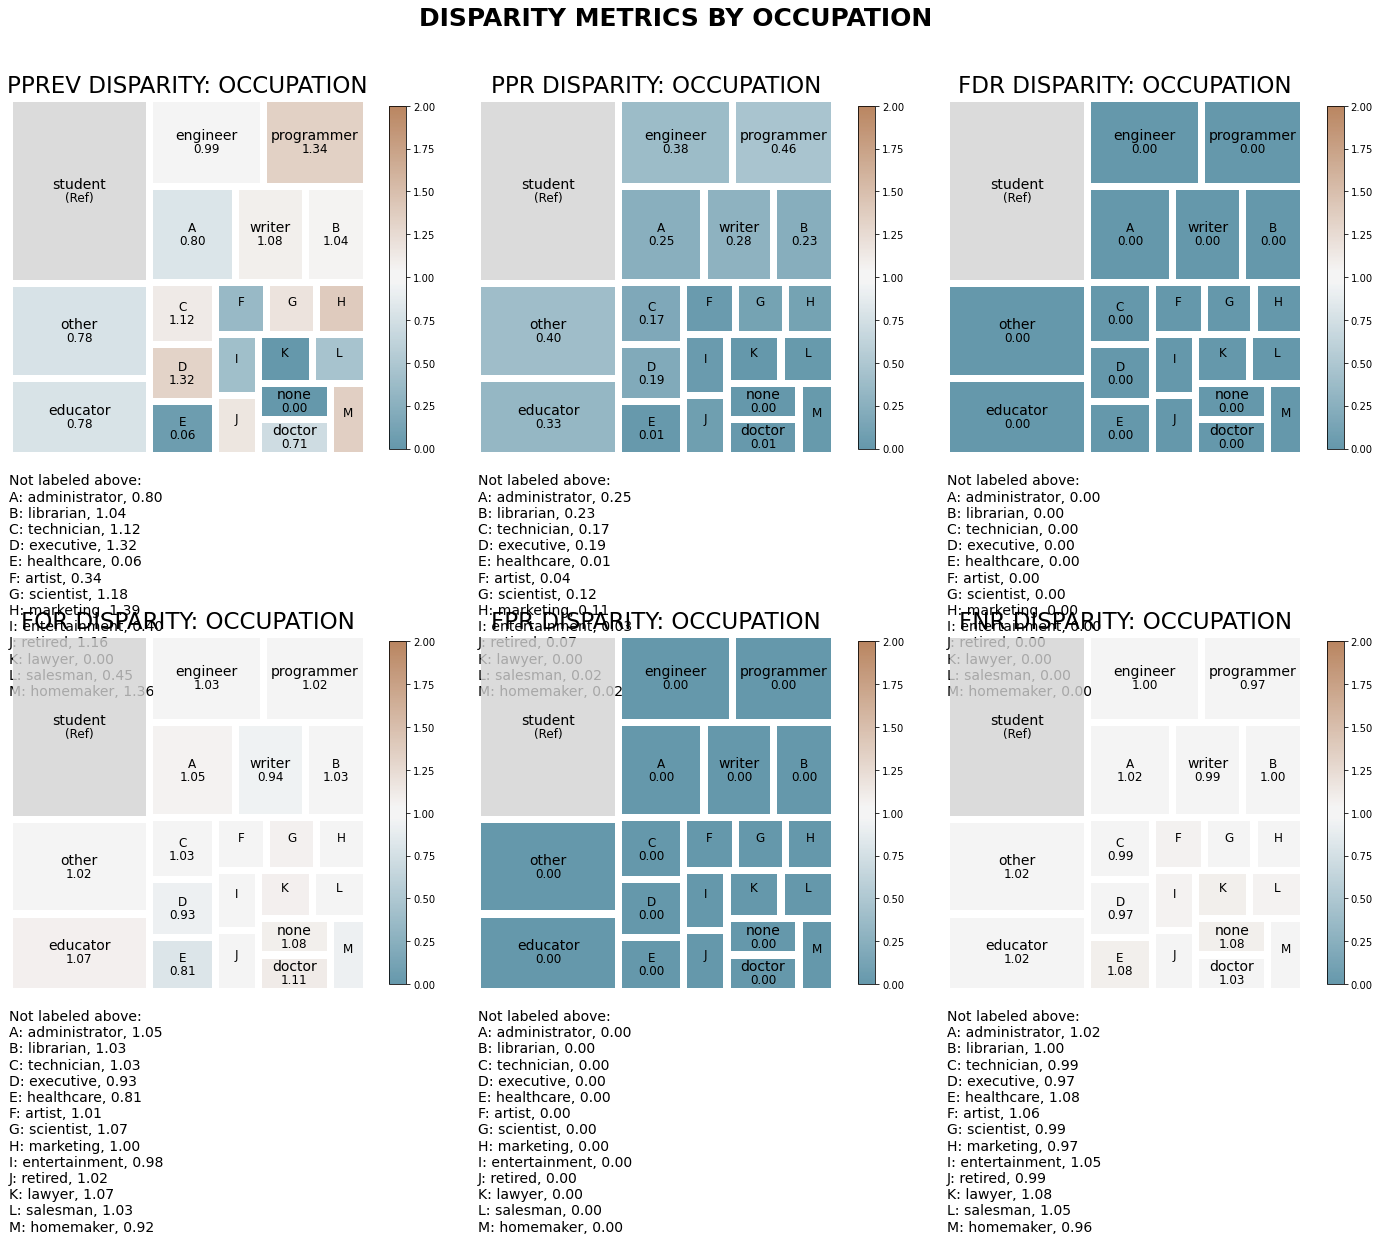

In [27]:
j = aqp.plot_disparity_all(majority_bdf, attributes=['occupation'], significance_alpha=0.05)

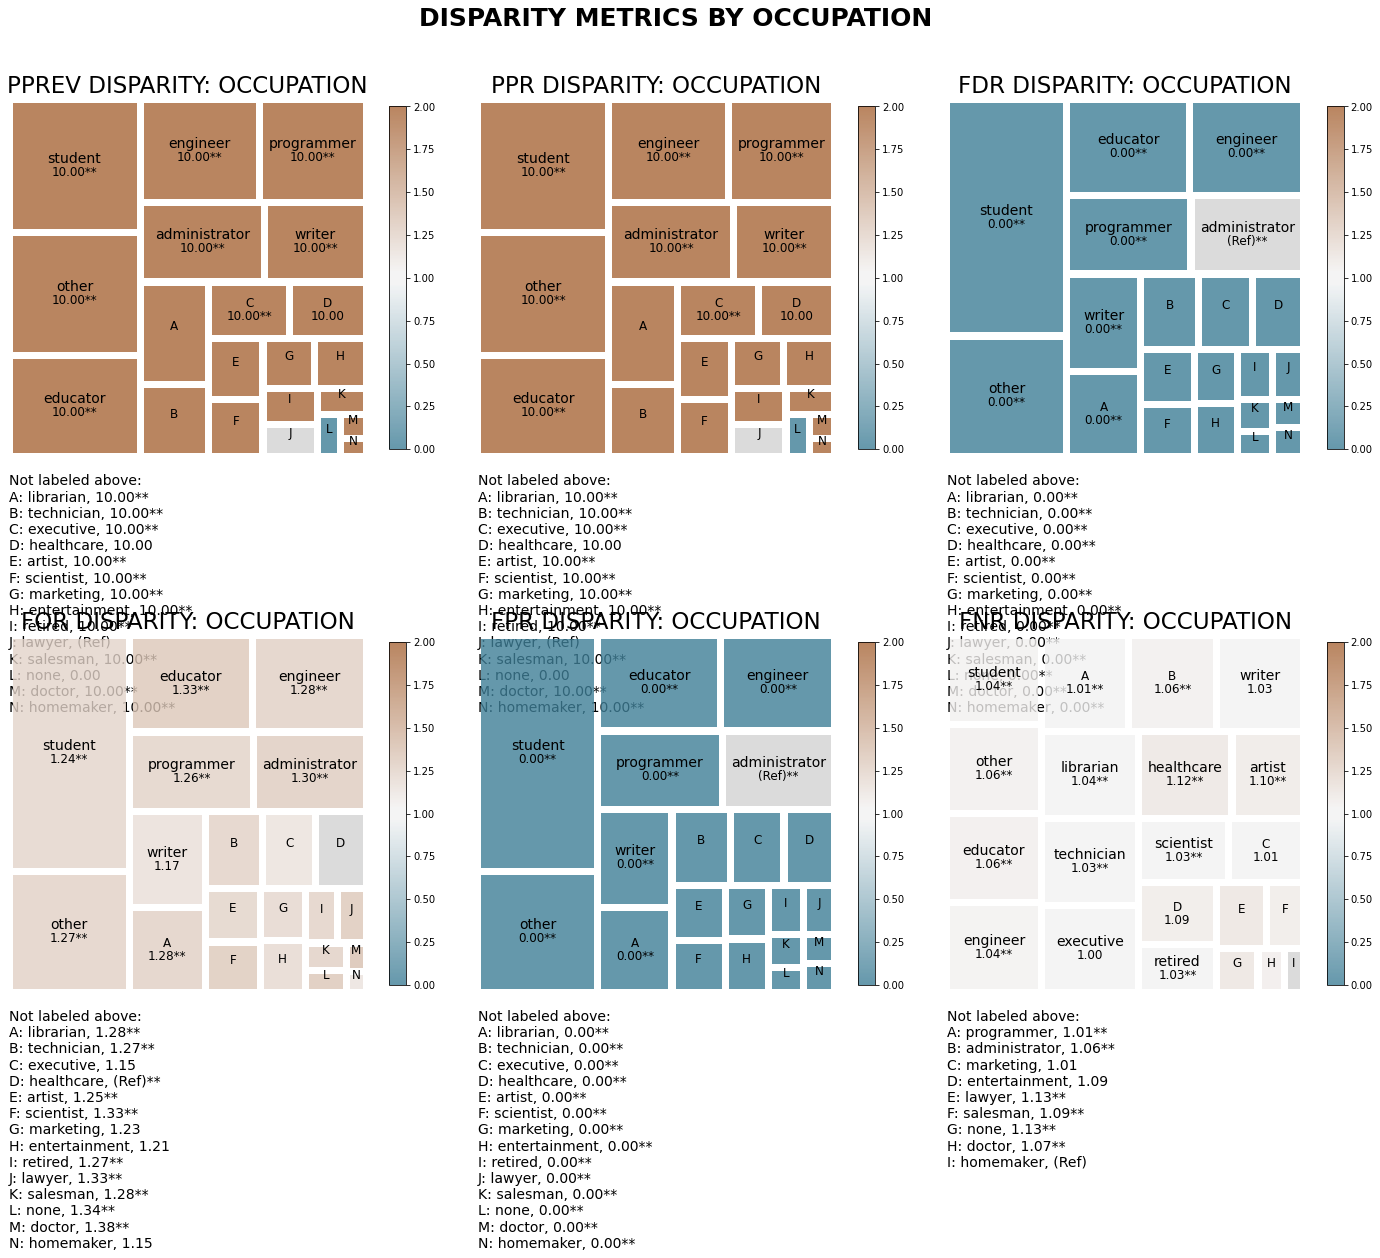

In [28]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['occupation'], significance_alpha=0.05)


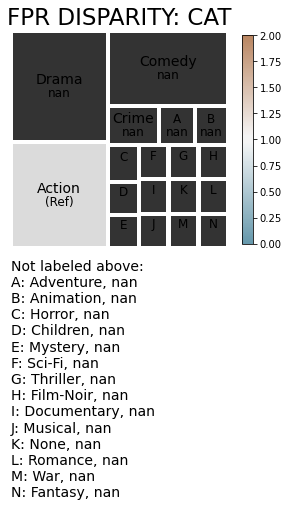

In [29]:
aqp.plot_disparity(min_metric_bdf, group_metric='fpr_disparity', attribute_name='cat', significance_alpha=0.05)


In [30]:
type(min_met)

matplotlib.figure.Figure

In [ ]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=full_trans_df, 
                                        ref_groups_dict={'cat':'Action', 'gender':'M', 'year':'1995.0', 'occupation': 'student'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style


In [33]:
# View disparity metrics added to dataframe
k = bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

In [36]:
type(bdf)

pandas.core.frame.DataFrame

In [35]:
type(k)

pandas.io.formats.style.Styler

In [37]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [38]:
fdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,4719,cat,Action,0.066603,1.0,0.802591,0.0,0.0,...,True,True,True,True,True,NaN,True,False,True,False
1,0,binary 0/1,4719,cat,Adventure,0.073670,1.0,0.810141,0.0,0.0,...,True,True,True,True,True,NaN,True,False,False,False
2,0,binary 0/1,4719,cat,Animation,0.090544,1.0,0.852781,0.0,0.0,...,True,False,True,False,True,NaN,True,False,False,False
3,0,binary 0/1,4719,cat,Children,0.052349,1.0,0.718941,0.0,0.0,...,True,False,True,False,True,NaN,True,False,False,False
4,0,binary 0/1,4719,cat,Comedy,0.060437,1.0,0.789246,0.0,0.0,...,True,True,True,True,True,NaN,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,binary 0/1,4719,occupation,salesman,0.034539,1.0,0.832624,0.0,0.0,...,True,False,True,True,True,NaN,True,False,False,False
109,0,binary 0/1,4719,occupation,scientist,0.086785,1.0,0.862197,0.0,0.0,...,True,True,True,False,True,NaN,True,False,False,False
110,0,binary 0/1,4719,occupation,student,0.078225,1.0,0.805968,0.0,0.0,...,True,True,True,True,True,NaN,True,False,True,False
111,0,binary 0/1,4719,occupation,technician,0.085334,1.0,0.827065,0.0,0.0,...,True,True,True,True,True,NaN,True,False,False,False


In [39]:
parity_detrminations = f.list_parities(fdf)

In [ ]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style


In [110]:
gaf = f.get_group_attribute_fairness(fdf)
gaf


,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,cat,False,False,NaN,NaN,False,True,False,True,False,True,NaN,False,False,False,False
1,0,binary 0/1,gender,False,True,NaN,NaN,True,True,True,True,True,True,NaN,True,False,False,False
2,0,binary 0/1,occupation,False,False,NaN,NaN,True,True,False,True,False,True,NaN,True,False,False,False
3,0,binary 0/1,year,False,False,NaN,NaN,False,True,False,True,False,True,NaN,False,False,False,False


In [111]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

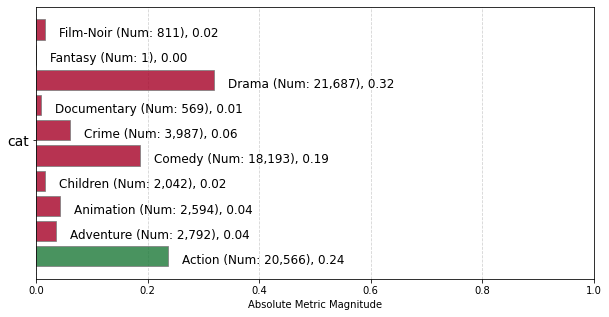

In [113]:
z = aqp.plot_fairness_group(fdf.iloc[:10, :], group_metric='ppr')


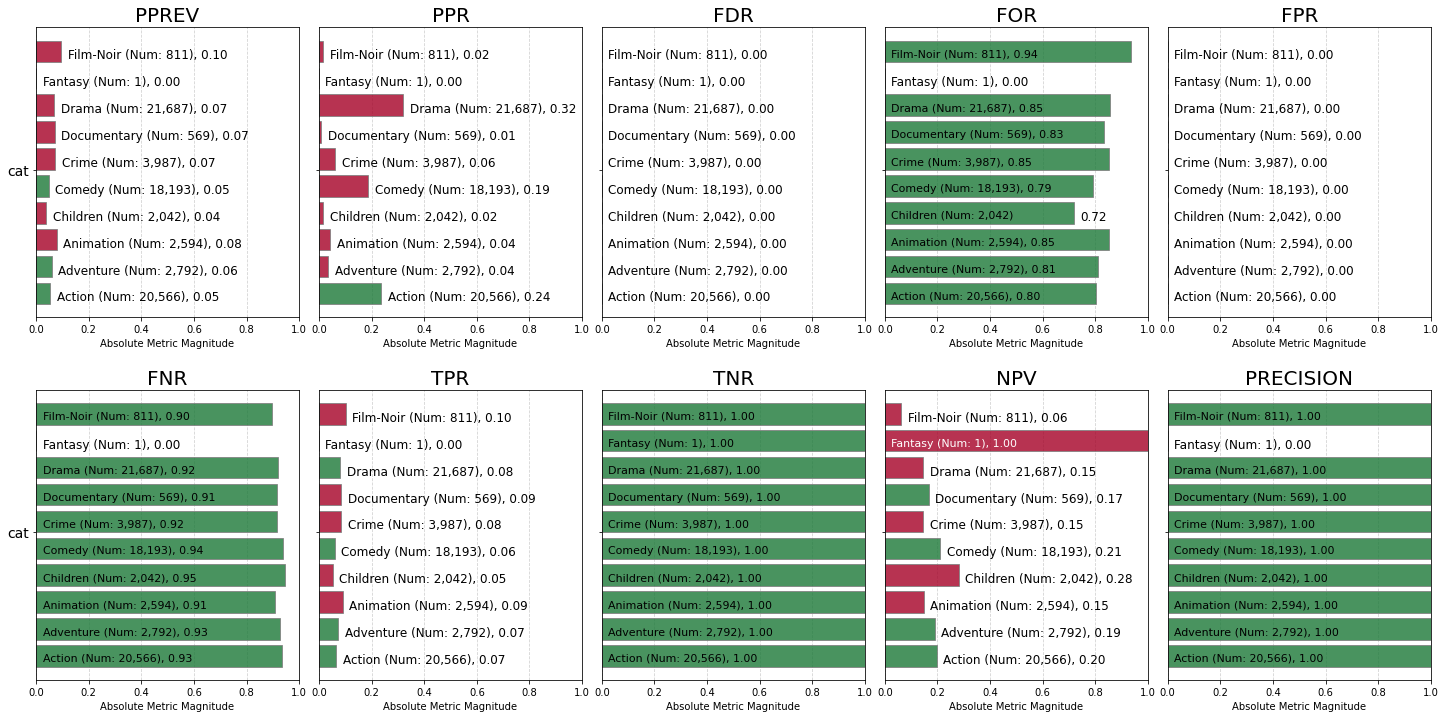

<Figure size 432x288 with 0 Axes>

In [114]:
fg = aqp.plot_fairness_group_all(fdf.iloc[:10, :], ncols=5, metrics = "all")


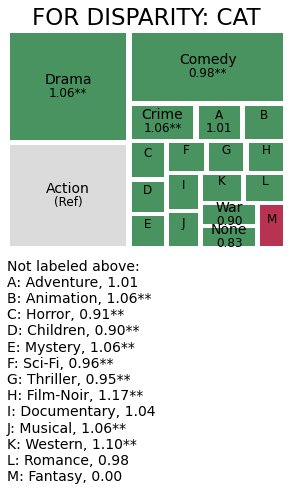

In [116]:
m = aqp.plot_fairness_disparity(fdf, group_metric='for', attribute_name='cat')

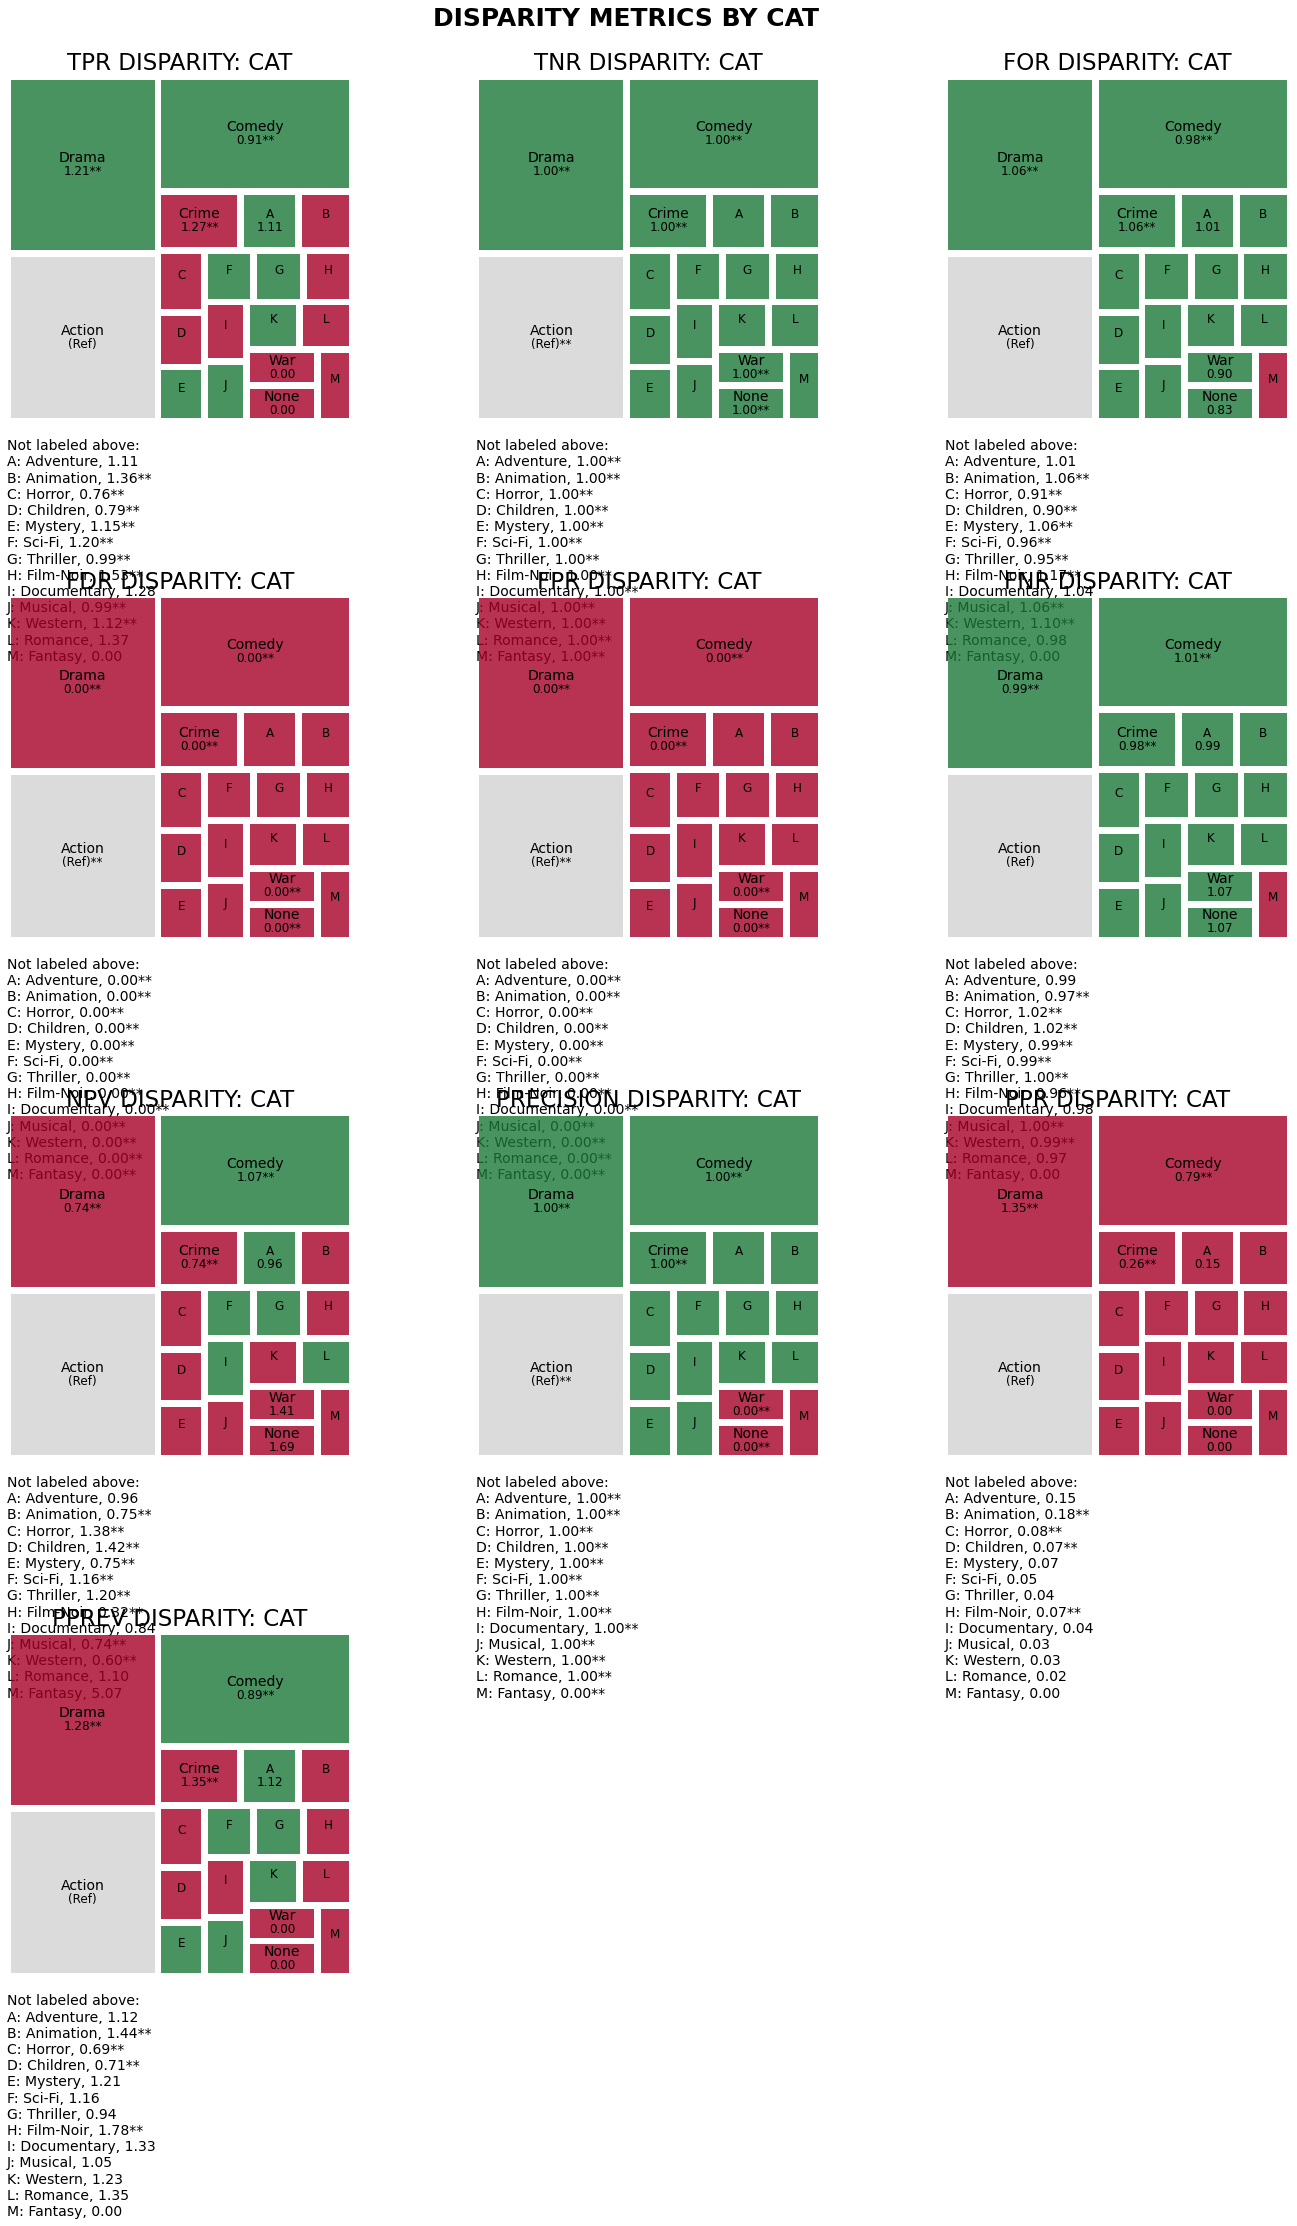

In [118]:
a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['cat'], metrics='all', 
                                       significance_alpha=0.05)